## Wombat MOM025 Wed Poly Maude Rise wind isolation

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage




Populating the interactive namespace from numpy and matplotlib


In [2]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/mom025_ocean_grid.nc'
vgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/ocean.ncra501-520.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
print geolon_t.shape

fh=fcor/ht
print fh.shape

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
print st_ocean.shape
print potrho.shape
print yt_ocean.shape


(1080, 1440)
(1080, 1440)
(50,)
(80,)
(1080,)


In [3]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
print (xr.__version__)

#my xarray version is old, no cumsum. Should be version 0.9.2 or newer?

0.9.6


In [4]:
NYFCntrlDir = '/g/data1/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data1/v45/pas561/mom/archive/wombat_jun16z_wp2/'


In [9]:
#plot wind stress
Ocean_File = os.path.join(NYFCntrlDir,'output1971/ocean_force*.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.tau_x.shape
cntrl_tx=ff.tau_x.load()

Ocean_File = os.path.join(NYFPertDir,'output197*/ocean_force*.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print ff.tau_x.shape
pert_tx=ff.tau_x.load()
print pert_tx.shape

/g/data1/v45/pas561/mom/archive/wombat_jun16z/output1971/ocean_force*.nc
(12, 1080, 1440)
/g/data1/v45/pas561/mom/archive/wombat_jun16z_wp2/output197*/ocean_force*.nc
(72, 1080, 1440)
(72, 1080, 1440)


/g/data1/v45/pas561/mom/archive/wombat_jun16z_wp2/wpm2_tx.pdf


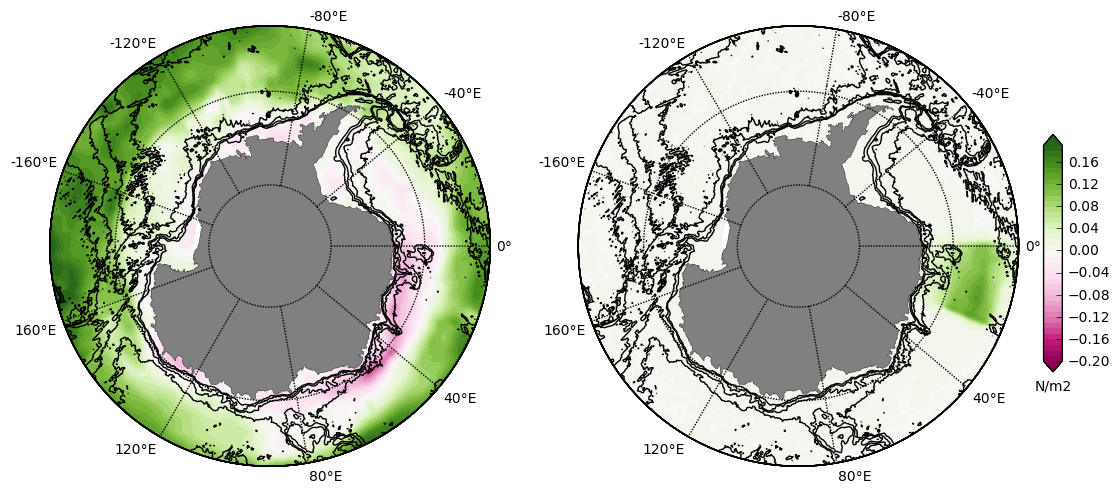

In [10]:

plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-.2,.2,.01)

plt.subplot(1,2,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,cntrl_tx[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('N/m2')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('Control Zonal Wind Stress')

#clev = np.arange(-.1,.1,.01)

plt.subplot(1,2,2)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,np.mean(pert_tx[0:11,:,:],axis=0)-np.mean(cntrl_tx[0:11,:,:],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('N/m2')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('Zonal Wind Stress Anomaly')

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('N/m2')

of = os.path.join(NYFPertDir,'wpm2_tx.pdf')
print of
plt.savefig(of)
of = os.path.join(NYFPertDir,'wpm2_tx.png')
plt.savefig(of,dpi=220)


0
1
2
3
4


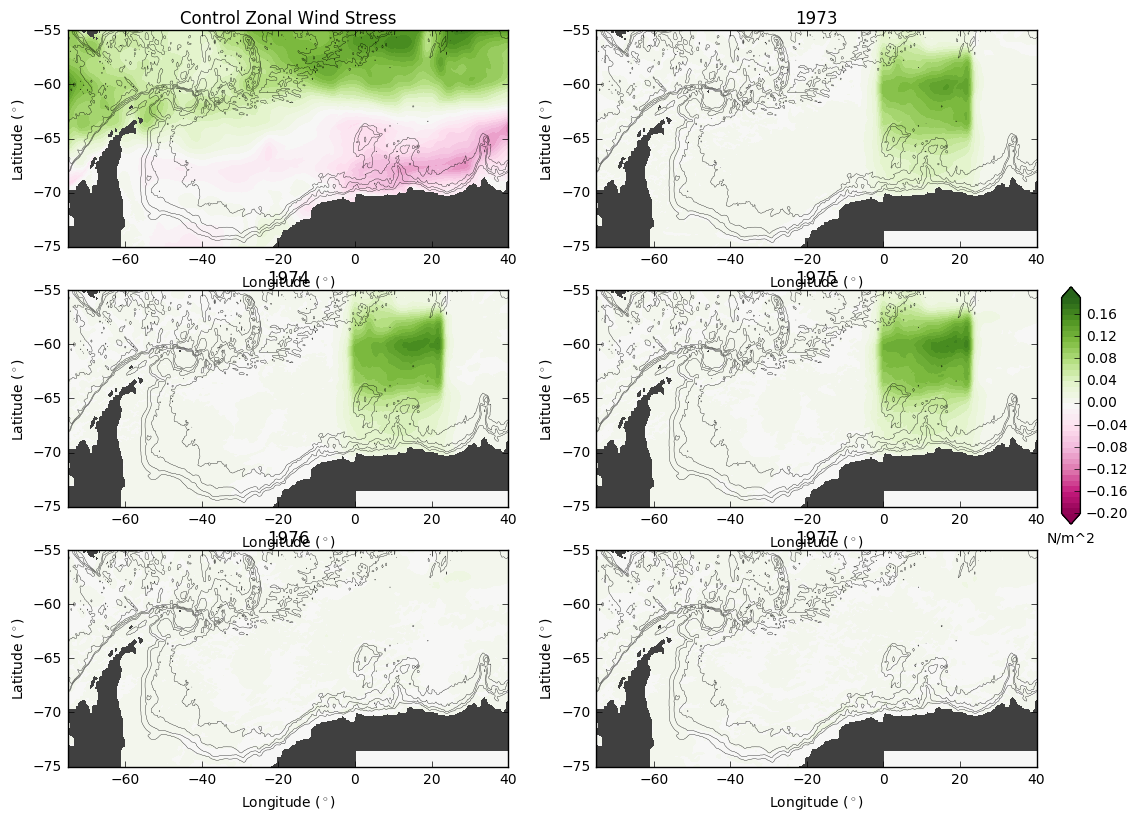

In [11]:
clev = np.arange(-.2,.2,.01)
clev3 = np.arange(0,5000,1000)

plt.subplot(321)
plt.gca().patch.set_color('.25')
p1=plt.contourf(xt_ocean,yt_ocean,cntrl_tx[0],cmap=plt.cm.PiYG,levels=clev,extend='both')
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('N/m^2')
clev3 = np.arange(0,5000,1000)
plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((-75,-55))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.xlim([-75,40])
plt.title('Control Zonal Wind Stress')


yrs=['1973','1974','1975','1976','1977','1978']

ii=0
for yr in range(0,5):
    
    #print yr
    plt.subplot(3,2,yr+2)
    plt.gca().patch.set_color('.25')
    p1=plt.contourf(xt_ocean,yt_ocean,np.mean(pert_tx[ii:ii+11,:,:],axis=0)-np.mean(cntrl_tx[0:11,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
    #cb=plt.colorbar(orientation='vertical',shrink = 0.7)
    #cb.ax.set_xlabel('N/m^2')
    clev3 = np.arange(0,5000,1000)
    plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
    plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((-75,-55))
    plt.xlabel('Longitude ($^\circ$)')
    plt.ylabel('Latitude ($^\circ$)')
    plt.xlim([-75,40])
    plt.title(yrs[yr])
    
    ii+=12
    
ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('N/m^2')

#of = os.path.join(NYFPertDir,'wpm2_cn.pdf')
#print of
#plt.savefig(of)
#of = os.path.join(NYFPertDir,'wpm2_cn.png')
#plt.savefig(of,dpi=220)


In [13]:
#plot stamps of sea ice concentration.
Ocean_File = os.path.join(NYFCntrlDir,'output1971/ice__*.nc')
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.CN.shape
nyf_cn=ff.CN.sum('ct').load()
print nyf_cn.shape

Ocean_File = os.path.join(NYFPertDir,'output197*/ice__*.nc')
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print ff.CN.shape
pert_cn=ff.CN.sum('ct').load()
print pert_cn.shape

print nyf_cn.shape
print pert_cn.shape
cn = np.concatenate((nyf_cn[0:12,:],pert_cn),axis=0)
print cn.shape


(12, 5, 1080, 1440)
(12, 1080, 1440)
(72, 5, 1080, 1440)
(72, 1080, 1440)
(12, 1080, 1440)
(72, 1080, 1440)
(84, 1080, 1440)


['June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.']
/g/data1/v45/pas561/mom/archive/wombat_jun16z_wp2/wpm2_cn.pdf


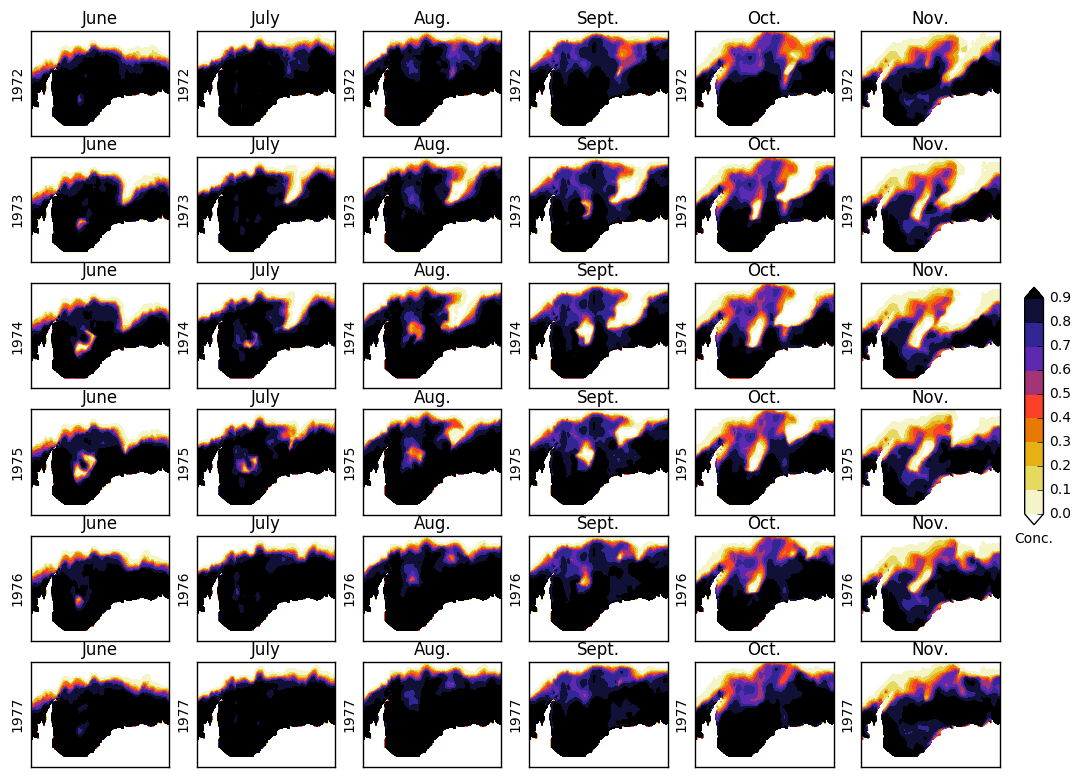

In [14]:
clev = np.arange(-.2,.2,.01)
clev3 = np.arange(0,5000,1000)

tits=['June','July','Aug.','Sept.','Oct.', 'Nov.']
yrs=['1972','1973','1974','1975','1976','1977']
print tits

ii=0
for yr in range(0,6):
    #print yr
    for i in range(5,11): 
        
        #print yr*12+i
    
        clev = np.arange(0,1,.1)
        plt.subplot(6,6,ii+1)
        plt.gca().patch.set_color('.25')
        p1=plt.contourf(xt_ocean,yt_ocean,pert_cn[yr*12+i,:,:],cmap=plt.cm.CMRmap_r,levels=clev,extend='both')
        #cb=plt.colorbar(orientation='vertical',shrink = 0.7)
        #cb.ax.set_xlabel('Conc.')
        #clev3 = np.arange(0,5000,1000)
        #plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
        plt.gca().yaxis.set_major_formatter(x_formatter)
        plt.ylim((-80,-55))
        #plt.xlabel('Longitude ($^\circ$)')
        plt.ylabel(yrs[yr])
        plt.xlim([-80,40])
        plt.title(tits[i-5])     
        plt.gca().axes.get_xaxis().set_ticks([])
        plt.gca().axes.get_yaxis().set_ticks([])
        
        ii+=1

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('Conc.')

of = os.path.join(NYFPertDir,'wpm2_cn.pdf')
print of
plt.savefig(of)
of = os.path.join(NYFPertDir,'wpm2_cn.png')
plt.savefig(of,dpi=220)


In [15]:
#Plot MLD
Ocean_File = os.path.join(NYFCntrlDir,'output1971/ocean__1*7.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.mld.shape
cntrl_mld=ff.mld.load()

Ocean_File = os.path.join(NYFPertDir,'output19*/ocean__1*7.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print ff.mld.shape
pert_mld=ff.mld.load()


/g/data1/v45/pas561/mom/archive/wombat_jun16z/output1971/ocean__1*7.nc
(1, 1080, 1440)
/g/data1/v45/pas561/mom/archive/wombat_jun16z_wp2/output19*/ocean__1*7.nc
(6, 1080, 1440)


/g/data1/v45/pas561/mom/archive/wombat_jun16z_wp2/wpm2_mld.pdf


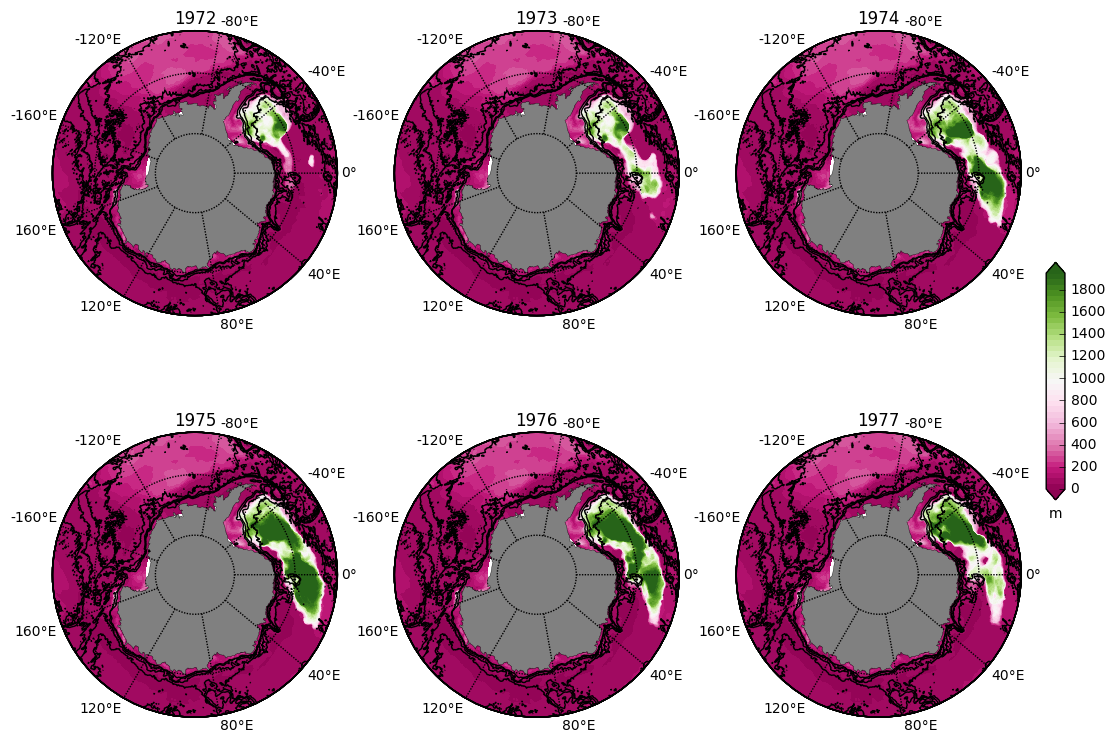

In [17]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(0,2000,50)
yrs=['1972','1973','1974','1975','1976','1977']

plt.subplot(2,3,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,cntrl_mld[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('N/m2')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title(yrs[0])


ii=0
for yr in range(0,5):
    #print yr

    plt.subplot(2,3,yr+2)
    map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
    map.drawcoastlines(linewidth=0.25)
    map.fillcontinents(color='gray',lake_color='gray')
    # draw parallels and meridians.
    map.drawparallels(np.arange(-80.,81.,15.))
    map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
    X, Y = map(geolon_t,geolat_t) 
    p1=map.contourf(X,Y,pert_mld[yr], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
    #cb=plt.colorbar(orientation='vertical',shrink = 0.5)
    #cb.ax.set_xlabel('N/m2')
    clev3 = np.arange(0,5000,1000)
    map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
    plt.title(yrs[yr+1])

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('m')

of = os.path.join(NYFPertDir,'wpm2_mld.pdf')
print of
plt.savefig(of)
of = os.path.join(NYFPertDir,'wpm2_mld.png')
plt.savefig(of,dpi=220)


/g/data1/v45/pas561/mom/archive/wombat_jun16z_wp2/wpm2_mld_1975anom.pdf


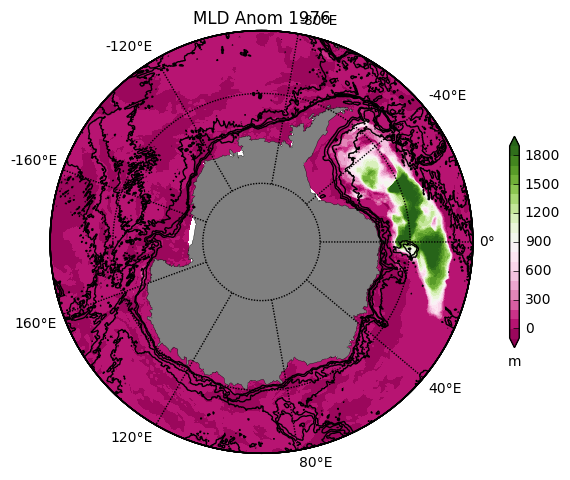

In [56]:
clev = np.arange(-100,2000,100)
plt.subplot(2,1,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,pert_mld[3]-cntrl_mld[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('m')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('MLD Anom 1976')

of = os.path.join(NYFPertDir,'wpm2_mld_1975anom.pdf')
print of
plt.savefig(of)
of = os.path.join(NYFPertDir,'wpm2_mld_1975anom.png')
plt.savefig(of,dpi=220)

## Calc the GMOC from ty_trans_rho 

In [25]:
Ocean_File = os.path.join(NYFPertDir,'output*/ocean__1*7.nc')
print Ocean_File

ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print ff.ty_trans_rho.shape

pert_gmoc=ff.ty_trans_rho[:,:,:,:].sum('grid_xt_ocean').cumsum('potrho').load()

print pert_gmoc.shape

of=os.path.join(NYFPertDir,'gmoc_rho.npy')
a=np.save(of,pert_gmoc)



/g/data1/v45/pas561/mom/archive/wombat_jun16z_wp2/output*/ocean__1*7.nc
(6, 80, 1080, 1440)
(6, 80, 1080)


In [23]:
Ocean_File = os.path.join(NYFCntrlDir,'output197*/ocean__1*.nc')
print Ocean_File

ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print ff.ty_trans_rho.shape

cntrl_gmoc=ff.ty_trans_rho[:,:,:,:].sum('grid_xt_ocean').cumsum('potrho').load()

print cntrl_gmoc.shape

of=os.path.join(NYFCntrlDir,'gmoc_rho.npy')
a=np.save(of,cntrl_gmoc)


/g/data1/v45/pas561/mom/archive/wombat_jun16z/output197*/ocean__1*.nc
(9, 80, 1080, 1440)
(9, 80, 1080)


In [26]:
#load gmoc in rho space
of=os.path.join(NYFPertDir,'gmoc_rho.npy')
pert_gmoc=np.load(of)
print pert_gmoc.shape

#of=os.path.join(NYFCntrlDir,'cntrl_gmocs.npy')
of=os.path.join(NYFCntrlDir,'gmoc_rho.npy')
cntrl_gmoc=np.load(of)
print cntrl_gmoc.shape



(6, 80, 1080)
(9, 80, 1080)


/g/data1/v45/pas561/mom/archive/wombat_jun16z_wp2/wpm2_gmoc.pdf


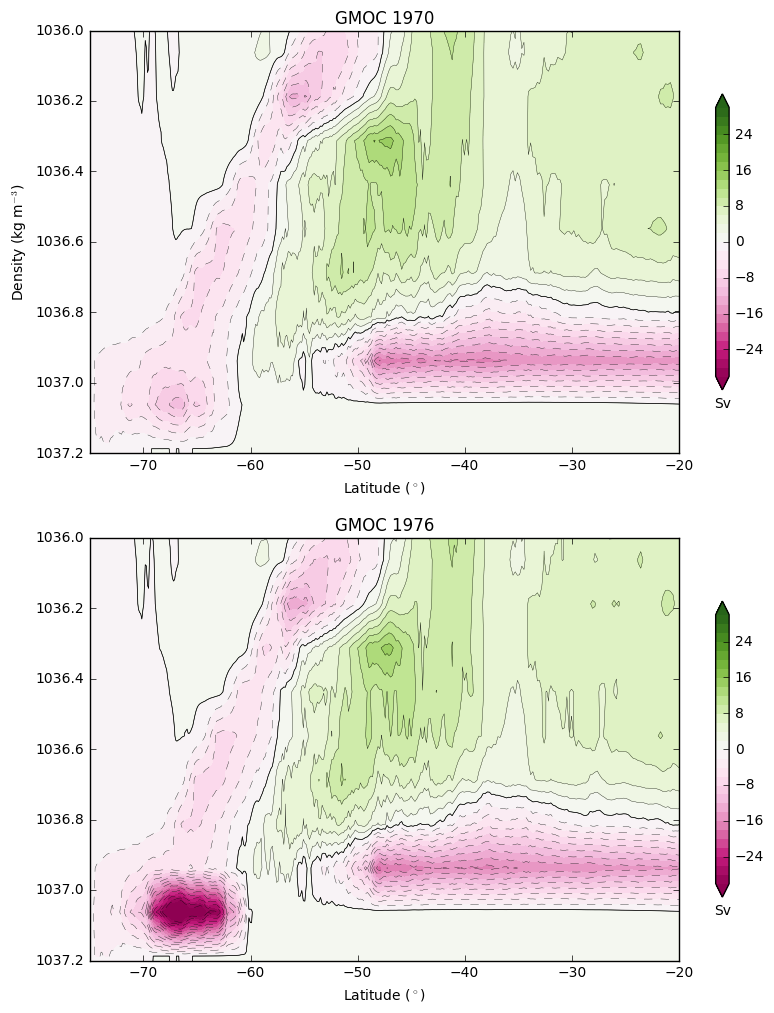

In [62]:
#plot gmoc in rho space
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-30,32,2)

t1=0
t2=5

plt.subplot(211)
plt.contourf(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-20])
tit='GMOC 1970'
plt.title(tit)

#clev = np.arange(-10,10,.1)

#np.mean(pert_gmoc[t1:t2,:,:],axis=0)-np.mean(cntrl_gmoc[t1:t2,:,:],axis=0)
plt.subplot(212)
plt.contourf(yu_ocean,potrho,pert_gmoc[4,:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,pert_gmoc[4,:,:],levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,pert_gmoc[4,:,:],levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
#plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-20])
tit='GMOC 1976'
plt.title(tit)


of = os.path.join(NYFPertDir,'wpm2_gmoc.pdf')
print of
plt.savefig(of)
of = os.path.join(NYFPertDir,'wpm2_gmoc.png')
plt.savefig(of,dpi=220)

(50,)


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:33: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:44: VisibleDeprecationWarning: converting an array with ndim > 0 to an

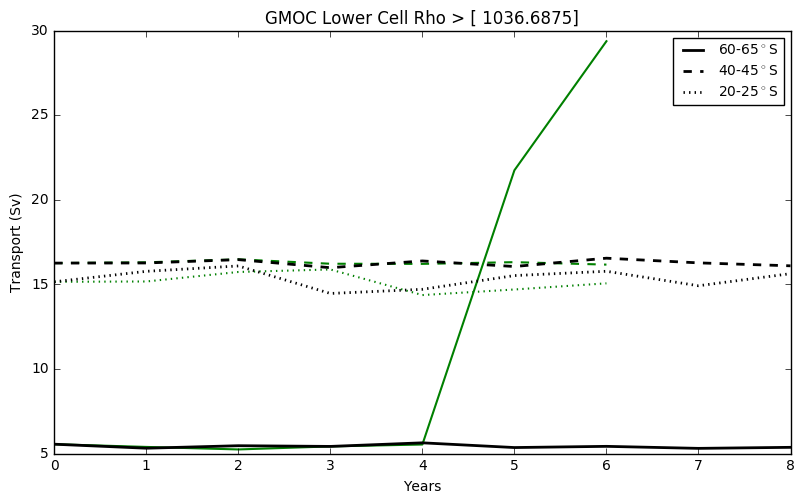

In [29]:
#plot time series of AABW
T=np.arange(50)
print T.shape

# do lower cell average between lats 60-65S
j1=np.argwhere(yt_ocean<-65)
j2=np.argwhere(yt_ocean<-60)
j1=j1[-1]
j2=j2[-1]

z1=np.argwhere(potrho<1036.75)
z1=z1[-1]

lc_cntrl60_psj = cntrl_gmoc[:,z1:,j1:j2]
lc_cntrl60_psj_bar = np.mean(lc_cntrl60_psj,2)
lc_cntrl60_psj_ts = -np.min(lc_cntrl60_psj_bar,1)

lc_pert60_psj = pert_gmoc[:,z1:,j1:j2]
lc_pert60_psj_bar = np.mean(lc_pert60_psj,2)
lc_pert60_psj_ts = -np.min(lc_pert60_psj_bar,1)
lc_pert60_psj_ts=np.insert(lc_pert60_psj_ts,0,lc_cntrl60_psj_ts[0])

# do lower cell average between lats 40-45S
j1=np.argwhere(yt_ocean<-45)
j2=np.argwhere(yt_ocean<-40)
j1=j1[-1]
j2=j2[-1]

lc_cntrl40_psj = cntrl_gmoc[:,z1:,j1:j2]
lc_cntrl40_psj_bar = np.mean(lc_cntrl40_psj,2)
lc_cntrl40_psj_ts = -np.min(lc_cntrl40_psj_bar,1)

lc_pert40_psj = pert_gmoc[:,z1:,j1:j2]
lc_pert40_psj_bar = np.mean(lc_pert40_psj,2)
lc_pert40_psj_ts = -np.min(lc_pert40_psj_bar,1)
lc_pert40_psj_ts=np.insert(lc_pert40_psj_ts,0,lc_cntrl40_psj_ts[0])

# do lower cell average between lats 20-25S
j1=np.argwhere(yt_ocean<-25)
j2=np.argwhere(yt_ocean<-20)
j1=j1[-1]
j2=j2[-1]

lc_cntrl20_psj = cntrl_gmoc[:,z1:,j1:j2]
lc_cntrl20_psj_bar = np.mean(lc_cntrl20_psj,2)
lc_cntrl20_psj_ts = -np.min(lc_cntrl20_psj_bar,1)

lc_pert20_psj = pert_gmoc[:,z1:,j1:j2]
lc_pert20_psj_bar = np.mean(lc_pert20_psj,2)
lc_pert20_psj_ts = -np.min(lc_pert20_psj_bar,1)
lc_pert20_psj_ts=np.insert(lc_pert20_psj_ts,0,lc_cntrl20_psj_ts[0])


plt.subplot(211)
plt.plot(lc_pert60_psj_ts,linestyle='-',color='g',linewidth=1.5)
plt.plot(lc_cntrl60_psj_ts,linestyle='-',color='k',label='60-65$^\circ$S',linewidth=2)
plt.plot(lc_pert40_psj_ts,linestyle='--',color='g',linewidth=1.5)
plt.plot(lc_cntrl40_psj_ts,linestyle='--',color='k',label='40-45$^\circ$S',linewidth=2)
plt.plot(lc_pert20_psj_ts,linestyle=':',color='g',linewidth=1.5)
plt.plot(lc_cntrl20_psj_ts,linestyle=':',color='k',label='20-25$^\circ$S',linewidth=2)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='GMOC Lower Cell Rho > ' +str(potrho[z1])
plt.title(tit)
plt.legend(fontsize=10)


In [43]:
#calc tx transport, acc transport
Ocean_File = os.path.join(NYFPertDir,'output*/ocean.nc')
print Ocean_File

ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.tx_trans.shape

pert_psi=ff.tx_trans[:,:,:,:].sum('st_ocean').cumsum('yt_ocean').load()

print pert_psi.shape

of=os.path.join(NYFPertDir,'psi_tx.npy')
a=np.save(of,pert_psi)


/g/data1/v45/pas561/mom/archive/gfdl_nyf_wpm2/output*/ocean.nc
(13, 50, 1080, 1440)
(13, 1080, 1440)


In [44]:
#calc tx transport, acc transport
Ocean_File = os.path.join(NYFCntrlDir,'output5*/ocean.nc')
print Ocean_File

ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.tx_trans.shape

nyf_psi=ff.tx_trans[:,:,:,:].sum('st_ocean').cumsum('yt_ocean').load()

print nyf_psi.shape

of=os.path.join(NYFCntrlDir,'psi_tx.npy')
a=np.save(of,nyf_psi)


/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/output5*/ocean.nc
(20, 50, 1080, 1440)
(20, 1080, 1440)


In [45]:
#load gmoc in rho space
of=os.path.join(NYFPertDir,'psi_tx.npy')
pert_psi=np.load(of)
print pert_psi.shape

#of=os.path.join(NYFCntrlDir,'cntrl_gmocs.npy')
of=os.path.join(NYFCntrlDir,'psi_tx.npy')
cntrl_psi=np.load(of)
print cntrl_psi.shape

(13, 1080, 1440)
(20, 1080, 1440)


[-200. -180. -160. -140. -120. -100.  -80.  -60.  -40.  -20.    0.   20.
   40.   60.   80.  100.  120.  140.  160.  180.  200.]


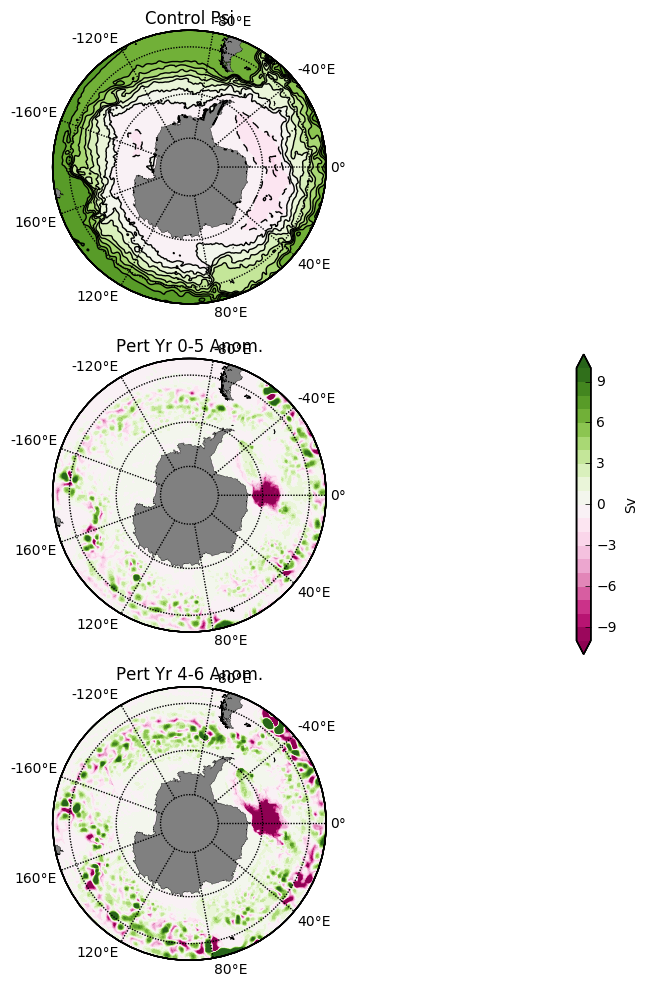

In [49]:
#plot ACC transport
clev = np.linspace(-200,200,21)
print clev

plt.subplot(3,1,1)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,np.mean(cntrl_psi[0:5],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#clev3 = np.arange(0,200,20)
#print clev3
map.contour(X,Y,np.mean(cntrl_psi[0:5],axis=0),levels=clev,colors='k',linewidths=1)
plt.title('Control Psi')

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
cb.ax.set_ylabel('Sv')

clev = np.linspace(-10,10,21)

plt.subplot(3,1,2)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,np.mean(pert_psi[0:5],axis=0)-np.mean(cntrl_psi[0:5],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#clev3 = np.arange(0,200,20)
#print clev3
#map.contour(X,Y,np.mean(pert_psi[0:5],axis=0)-np.mean(cntrl_psi[0:5],axis=0),levels=clev,colors='k',linewidths=1)
plt.title('Pert Yr 0-5 Anom.')

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
cb.ax.set_ylabel('Sv')


plt.subplot(3,1,3)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,np.mean(pert_psi[4:7],axis=0)-np.mean(cntrl_psi[4:7],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#clev3 = np.arange(0,200,20)
#print clev3
#map.contour(X,Y,np.mean(pert_psi[4:7],axis=0)-np.mean(cntrl_psi[4:7],axis=0),levels=clev,colors='k',linewidths=1)
plt.title('Pert Yr 4-6 Anom.')

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
cb.ax.set_ylabel('Sv')

In [38]:
#plot temp
Ocean_File = os.path.join(NYFCntrlDir,'output1971/ocean__1*.nc')
print Ocean_File

ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print ff.temp.shape

#cntrl_ztemp=ff.temp[0:5,:,0:500,859:1279].mean('time').mean('xt_ocean').load()
cntrl_temp=ff.temp[:,:,0:500,:].mean('Time').load()
print cntrl_temp.shape

#print xt_ocean[x1:x2]
Ocean_File = os.path.join(NYFPertDir,'output197*/ocean__1*7.nc')
print Ocean_File

ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print ff.temp.shape

#pert_ztemp=ff.temp[0:5,:,0:500,859:1279].mean('time').mean('xt_ocean').load()
#print pert_ztemp.shape

pert_temp=ff.temp[:,:,0:500,:].load()
print pert_temp.shape


/g/data1/v45/pas561/mom/archive/wombat_jun16z/output1971/ocean__1*.nc
(1, 50, 1080, 1440)


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


(50, 500, 1440)
/g/data1/v45/pas561/mom/archive/wombat_jun16z_wp2/output197*/ocean__1*7.nc
(6, 50, 1080, 1440)
(6, 50, 500, 1440)


55.8532485962
[-2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8
  1.   1.2  1.4  1.6  1.8  2. ]


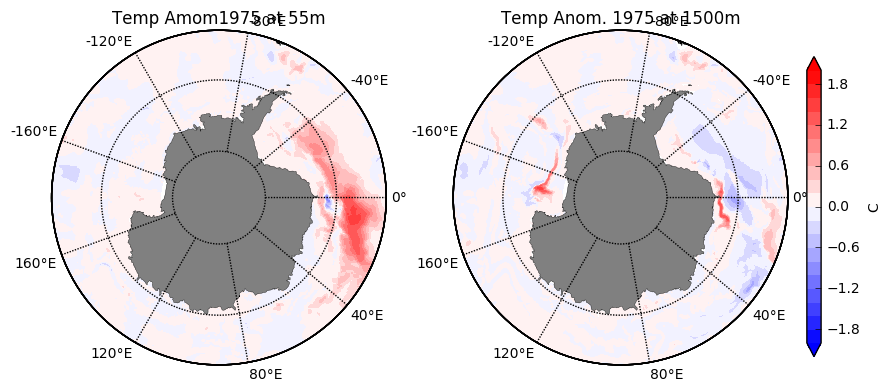

In [46]:
print st_ocean[5]

clev = np.linspace(-2,2,21)
print clev

plt.subplot(1,2,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
p1=map.contourf(X,Y,pert_temp[3,5,:,:]-cntrl_temp[5,:,:], cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#clev3 = np.arange(0,200,20)
#print clev3
#map.contour(X,Y,np.mean(cntrl_psi[0:5],axis=0),levels=clev,colors='k',linewidths=1)
plt.title('Temp Amom1975 at 55m')

#clev = np.linspace(-1,1,11)

plt.subplot(1,2,2)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
p1=map.contourf(X,Y,pert_temp[3,13,:,:]-cntrl_temp[13,:,:], cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#clev3 = np.arange(0,200,20)
#print clev3
#map.contour(X,Y,np.mean(cntrl_psi[0:5],axis=0),levels=clev,colors='k',linewidths=1)
plt.title('Temp Anom. 1975 at 1500m')


ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
cb.ax.set_ylabel('C')




148.746643066
[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]


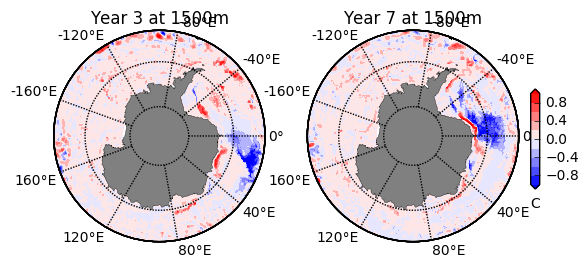

In [20]:
print st_ocean[13]

clev = np.linspace(-1,1,11)
print clev

plt.subplot(1,2,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
p1=map.contourf(X,Y,pert_temp[2,13,:,:]-cntrl_temp[13,:,:], cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#clev3 = np.arange(0,200,20)
#print clev3
#map.contour(X,Y,np.mean(cntrl_psi[0:5],axis=0),levels=clev,colors='k',linewidths=1)
plt.title('Year 3 at 1500m')

plt.subplot(1,2,2)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
p1=map.contourf(X,Y,pert_temp[6,13,:,:]-cntrl_temp[13,:,:], cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#clev3 = np.arange(0,200,20)
#print clev3
#map.contour(X,Y,np.mean(cntrl_psi[0:5],axis=0),levels=clev,colors='k',linewidths=1)
plt.title('Year 7 at 1500m')

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
cb.ax.set_xlabel('C')


In [47]:
#calc zonal average temp anomalies
#Plot zonal average temp anomaly across weddell
x1=np.argwhere(xt_ocean<-15)
x2=np.argwhere(xt_ocean<15)
x1=x1[-1]
x2=x2[-1]

print x1, x2

print xt_ocean[x1:x2]
#print xt_ocean[x1:x2]

[1059] [1179]
[-15.125 -14.875 -14.625 -14.375 -14.125 -13.875 -13.625 -13.375 -13.125
 -12.875 -12.625 -12.375 -12.125 -11.875 -11.625 -11.375 -11.125 -10.875
 -10.625 -10.375 -10.125  -9.875  -9.625  -9.375  -9.125  -8.875  -8.625
  -8.375  -8.125  -7.875  -7.625  -7.375  -7.125  -6.875  -6.625  -6.375
  -6.125  -5.875  -5.625  -5.375  -5.125  -4.875  -4.625  -4.375  -4.125
  -3.875  -3.625  -3.375  -3.125  -2.875  -2.625  -2.375  -2.125  -1.875
  -1.625  -1.375  -1.125  -0.875  -0.625  -0.375  -0.125   0.125   0.375
   0.625   0.875   1.125   1.375   1.625   1.875   2.125   2.375   2.625
   2.875   3.125   3.375   3.625   3.875   4.125   4.375   4.625   4.875
   5.125   5.375   5.625   5.875   6.125   6.375   6.625   6.875   7.125
   7.375   7.625   7.875   8.125   8.375   8.625   8.875   9.125   9.375
   9.625   9.875  10.125  10.375  10.625  10.875  11.125  11.375  11.625
  11.875  12.125  12.375  12.625  12.875  13.125  13.375  13.625  13.875
  14.125  14.375  14.625]


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


(50, 500, 1440)
(6, 50, 500, 1440)
/g/data1/v45/pas561/mom/archive/wombat_jun16z_wp2/wpm2_zavTanom.pdf


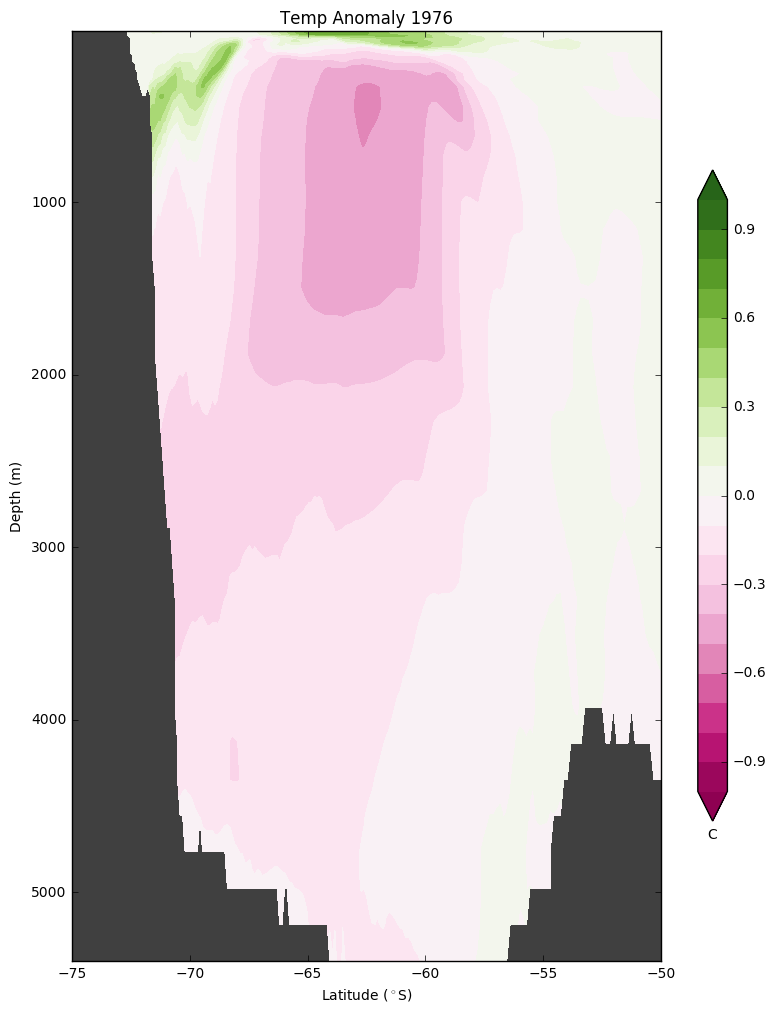

In [55]:
print cntrl_temp.shape
print pert_temp.shape

#plt.subplot(211)
#clev = np.arange(-2,20,1)
#plt.contourf(yt_ocean[0:500],st_ocean,np.mean(cntrl_temp[:,:,x1:x2],axis=2),cmap=plt.cm.PiYG,levels=clev,extend='both')
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('Temp')
#plt.contour(yt_ocean[0:500],st_ocean,np.mean(cntrl_temp[:,:,x1:x2],axis=2),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,np.mean(cntrl_temp[:,:,x1:x2],axis=2),levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
##plt.gca().yaxis.set_major_formatter(x_formatter)
##plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
#plt.xlim([-75,-50])
#plt.title('Control Temp')

plt.subplot(111)
plt.gca().patch.set_color('.25')
clev = np.arange(-1,1.1,0.1)
plt.contourf(yt_ocean[0:500],st_ocean,np.mean(pert_temp[4,:,:,x1:x2],axis=2)-np.mean(cntrl_temp[:,:,x1:x2],axis=2),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('C')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('Temp Anomaly 1976')

of = os.path.join(NYFPertDir,'wpm2_zavTanom.pdf')
print of
plt.savefig(of)
of = os.path.join(NYFPertDir,'wpm2_zavTanom.png')
plt.savefig(of,dpi=220)

In [20]:
#cacl cntrl gmoc in z space for jul15bR2
Ocean_File = '/g/data1/v45/pas561/mom/archive/wombat_jul15bR2/wombat_jul15bR2_ty_trans.ann.nc'
print Ocean_File

ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print ff.ty_trans.shape

cntrl_gmoc=ff.ty_trans[:,:,:,:].sum('xt_ocean').cumsum('st_ocean').load()

print cntrl_gmoc.shape

of=os.path.join('/g/data1/v45/pas561/mom/archive/wombat_jul15bR2/','gmoc_z.npy')
a=np.save(of,cntrl_gmoc)

/g/data1/v45/pas561/mom/archive/wombat_jul15bR2/wombat_jul15bR2_ty_trans.ann.nc
(10, 50, 1080, 1440)
(10, 50, 1080)


In [22]:
#load gmoc in  z  space from wombat sims 
of=os.path.join('/g/data1/v45/pas561/mom/archive/wombat_jun16y_wedpoly/','piwed_gmoc_z.npy')
pert_gmoc_z=np.load(of)
print pert_gmoc_z.shape

#of=os.path.join(NYFCntrlDir,'cntrl_gmocs.npy')
of=os.path.join('/g/data1/v45/pas561/mom/archive/wombat_jul15bR2/','gmoc_z.npy')
cntrl_gmoc_z=np.load(of)
print cntrl_gmoc_z.shape

(20, 50, 1080)
(10, 50, 1080)


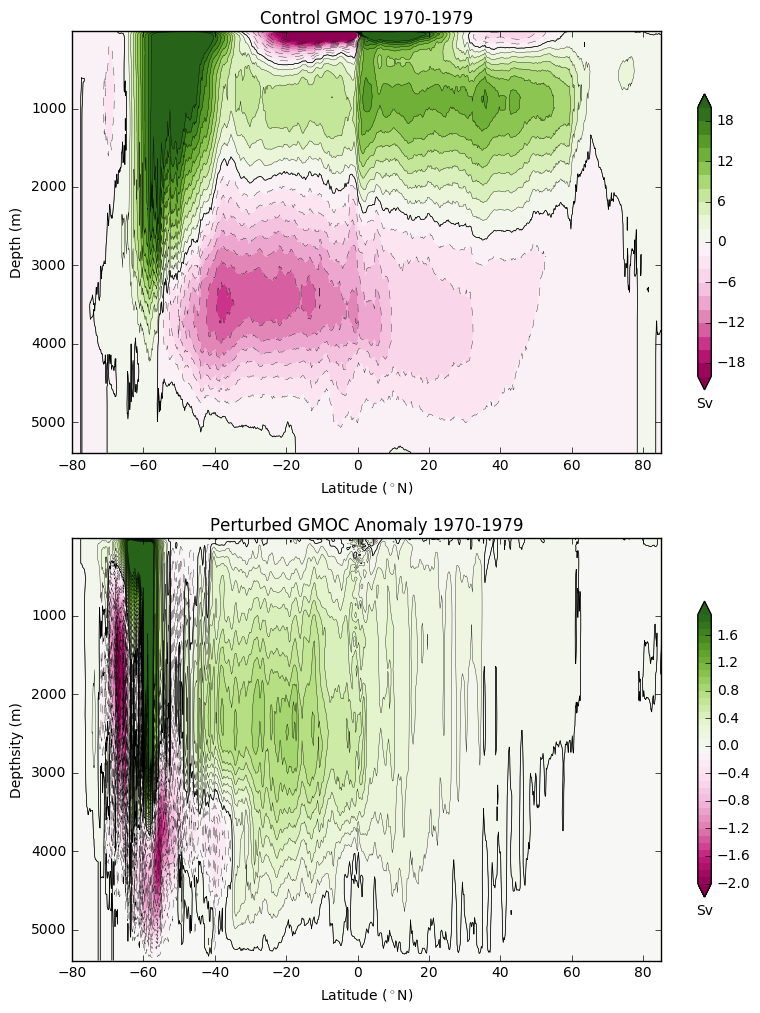

In [28]:
#Plot Gmoc in Z space
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-20,22,2)

t1=0
t2=10

plt.subplot(211)
plt.contourf(yu_ocean,st_ocean,np.mean(cntrl_gmoc_z[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,st_ocean,np.mean(cntrl_gmoc_z[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,st_ocean,np.mean(cntrl_gmoc_z[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-80,85])
tit='Control GMOC 1970-1979'
plt.title(tit)

clev = np.arange(-2,2,.1)

plt.subplot(212)
plt.contourf(yu_ocean,st_ocean,np.mean(pert_gmoc_z[t1:t2,:,:],axis=0)-np.mean(cntrl_gmoc_z[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,st_ocean,np.mean(pert_gmoc_z[t1:t2,:,:],axis=0)-np.mean(cntrl_gmoc_z[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,st_ocean,np.mean(pert_gmoc_z[t1:t2,:,:],axis=0)-np.mean(cntrl_gmoc_z[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depthsity (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-80,85])
tit='Perturbed GMOC Anomaly 1970-1979'
plt.title(tit)



In [28]:
## Calc the AMOC from ty_trans for forcing cases

(1080, 1440)
[-2 -1  0  1]


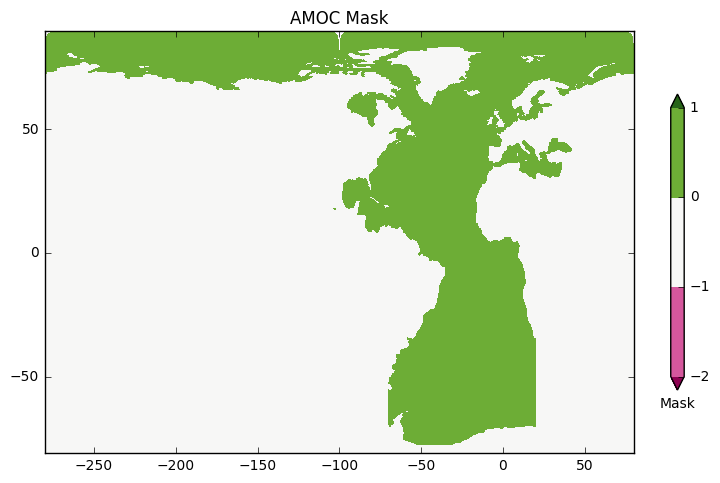

In [29]:
#calculate the AMOC mask
#-1 is Atl and Arctic, all other ocean is -2, land is 0
#reset to 1 and 0
msk_file='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/basin_mask.nc'
nc = Dataset(msk_file, mode='r') # file handle, open in read only mode
msk= nc.variables['kmt'][:]
nc.close() # close the file
print msk.shape
msk[np.where(msk<-1)]=0
msk[np.where(msk==-1)]=1

clev = np.arange(-2,2,1)
print clev

plt.subplot(211)
plt.contourf(geolon_t,geolat_t,msk,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Mask')
plt.title('AMOC Mask')

In [30]:
#do AMOC in zspace
ff=xr.open_mfdataset('/g/data1/v45/pas561/mom/archive/wombat_jun16y_wedpoly/ty_trans.ann.nc',engine='netcdf4',concat_dim='time',decode_times=False)
print ff.ty_trans.shape
ty=ff.ty_trans*msk
print ty.shape
amoc=ty[:,:,:,:].sum('xt_ocean').cumsum('st_ocean').load()
print amoc.shape

of=os.path.join(Pert2Dir,'piwed_amoc_z.npy')
a=np.save(of,amoc)

(20, 50, 1080, 1440)
(20, 50, 1080, 1440)
(20, 50, 1080)


In [33]:
of=os.path.join(Pert2Dir,'piwed_amoc_z.npy')
pert_amoc_z=np.load(of)
print pert_amoc_z.shape


(20, 50, 1080)
(51, 50, 1080)


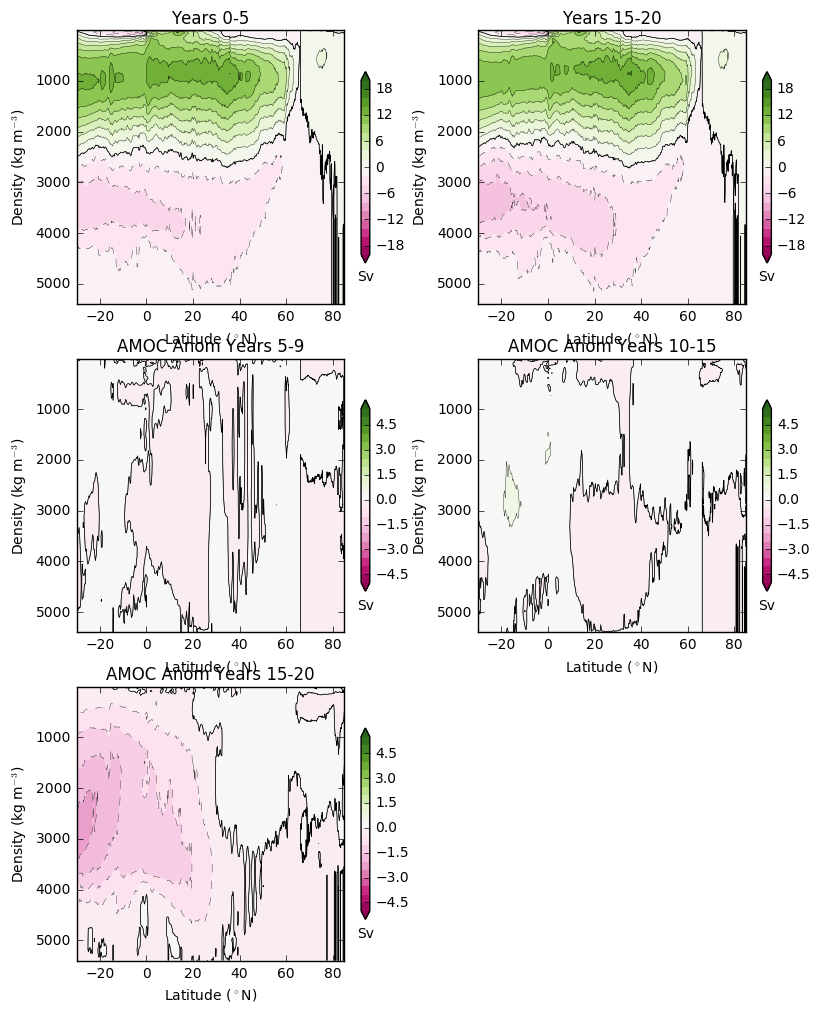

In [39]:
#Amoc in Z space
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-20,22,2)

t1=0
t2=5

plt.subplot(321)
plt.contourf(yu_ocean,st_ocean,np.mean(pert_amoc_z[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,st_ocean,np.mean(pert_amoc_z[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,st_ocean,np.mean(pert_amoc_z[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,85])
tit='Years '+str(t1)+'-'+str(t2)
plt.title(tit)

t1=15
t2=20

plt.subplot(322)
plt.contourf(yu_ocean,st_ocean,np.mean(pert_amoc_z[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,st_ocean,np.mean(pert_amoc_z[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,st_ocean,np.mean(pert_amoc_z[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,85])
tit='Years '+str(t1)+'-'+str(t2)
plt.title(tit)

t1=5
t2=9

clev = np.arange(-5,6,.5)

plt.subplot(323)
plt.contourf(yu_ocean,st_ocean,np.mean(pert_amoc_z[t1:t2,:,:],axis=0)-np.mean(pert_amoc_z[0:5,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,st_ocean,np.mean(pert_amoc_z[t1:t2,:,:],axis=0)-np.mean(pert_amoc_z[0:5,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,st_ocean,np.mean(pert_amoc_z[t1:t2,:,:],axis=0)-np.mean(pert_amoc_z[0:5,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,85])
tit='AMOC Anom Years '+str(t1)+'-'+str(t2)
plt.title(tit)

t1=10
t2=15

plt.subplot(324)
plt.contourf(yu_ocean,st_ocean,np.mean(pert_amoc_z[t1:t2,:,:],axis=0)-np.mean(pert_amoc_z[0:5,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,st_ocean,np.mean(pert_amoc_z[t1:t2,:,:],axis=0)-np.mean(pert_amoc_z[0:5,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,st_ocean,np.mean(pert_amoc_z[t1:t2,:,:],axis=0)-np.mean(pert_amoc_z[0:5,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,85])
tit='AMOC Anom Years '+str(t1)+'-'+str(t2)
plt.title(tit)

t1=15
t2=20

plt.subplot(325)
plt.contourf(yu_ocean,st_ocean,np.mean(pert_amoc_z[t1:t2,:,:],axis=0)-np.mean(pert_amoc_z[0:5,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,st_ocean,np.mean(pert_amoc_z[t1:t2,:,:],axis=0)-np.mean(pert_amoc_z[0:5,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,st_ocean,np.mean(pert_amoc_z[t1:t2,:,:],axis=0)-np.mean(pert_amoc_z[0:5,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,85])
tit='AMOC Anom Years '+str(t1)+'-'+str(t2)
plt.title(tit)

(20,)


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:35: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:46: VisibleDeprecationWarning: converting an array with ndim > 0 to an

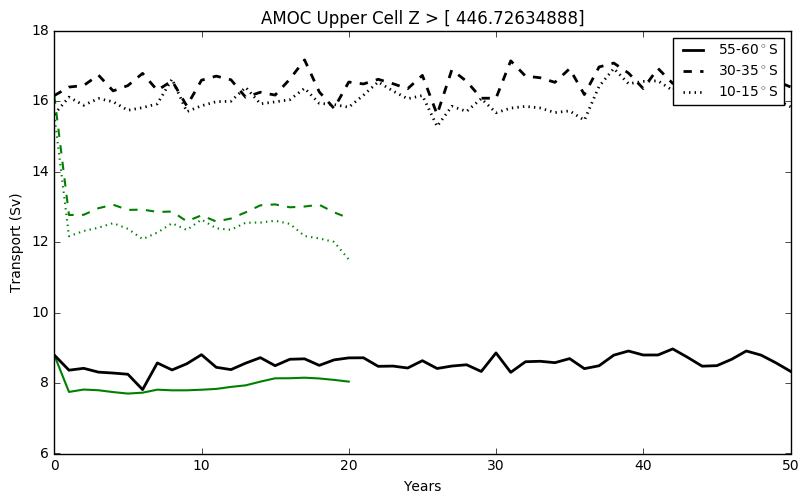

In [40]:
#plot time series of AMOC in z space
T=np.arange(20)
print T.shape


# do lower cell average between lats 55-60N
j1=np.argwhere(yt_ocean<55)
j2=np.argwhere(yt_ocean<60)
j1=j1[-1]
j2=j2[-1]

z1=np.argwhere(st_ocean<500)
z1=z1[-1]

uc_cntrl50_psj = cntrl_amoc_z[:,z1:,j1:j2]
uc_cntrl50_psj_bar = np.mean(uc_cntrl50_psj,2)
uc_cntrl50_psj_ts = np.max(uc_cntrl50_psj_bar,1)

uc_pert50_psj = pert_amoc_z[:,z1:,j1:j2]
uc_pert50_psj_bar = np.mean(uc_pert50_psj,2)
uc_pert50_psj_ts = np.max(uc_pert50_psj_bar,1)
uc_pert50_psj_ts=np.insert(uc_pert50_psj_ts,0,uc_cntrl50_psj_ts[0])


# do lower cell average between lats 40-45N
j1=np.argwhere(yt_ocean<30)
j2=np.argwhere(yt_ocean<35)
j1=j1[-1]
j2=j2[-1]

uc_cntrl40_psj = cntrl_amoc_z[:,z1:,j1:j2]
uc_cntrl40_psj_bar = np.mean(uc_cntrl40_psj,2)
uc_cntrl40_psj_ts = np.max(uc_cntrl40_psj_bar,1)

uc_pert40_psj = pert_amoc_z[:,z1:,j1:j2]
uc_pert40_psj_bar = np.mean(uc_pert40_psj,2)
uc_pert40_psj_ts = np.max(uc_pert40_psj_bar,1)
uc_pert40_psj_ts=np.insert(uc_pert40_psj_ts,0,uc_cntrl40_psj_ts[0])

# do lower cell average between lats 20-25N
j1=np.argwhere(yt_ocean<10)
j2=np.argwhere(yt_ocean<15)
j1=j1[-1]
j2=j2[-1]

uc_cntrl20_psj = cntrl_amoc_z[:,z1:,j1:j2]
uc_cntrl20_psj_bar = np.mean(uc_cntrl20_psj,2)
uc_cntrl20_psj_ts = np.max(uc_cntrl20_psj_bar,1)

uc_pert20_psj = pert_amoc_z[:,z1:,j1:j2]
uc_pert20_psj_bar = np.mean(uc_pert20_psj,2)
uc_pert20_psj_ts = np.max(uc_pert20_psj_bar,1)
uc_pert20_psj_ts=np.insert(uc_pert20_psj_ts,0,uc_cntrl20_psj_ts[0])


plt.subplot(211)
plt.plot(uc_pert50_psj_ts,linestyle='-',color='g',linewidth=1.5)
plt.plot(uc_cntrl50_psj_ts,linestyle='-',color='k',label='55-60$^\circ$N',linewidth=2)
plt.plot(uc_pert40_psj_ts,linestyle='--',color='g',linewidth=1.5)
plt.plot(uc_cntrl40_psj_ts,linestyle='--',color='k',label='30-35$^\circ$N',linewidth=2)
plt.plot(uc_pert20_psj_ts,linestyle=':',color='g',linewidth=1.5)
plt.plot(uc_cntrl20_psj_ts,linestyle=':',color='k',label='10-15$^\circ$N',linewidth=2)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='AMOC Upper Cell Z > ' +str(st_ocean[z1])
plt.title(tit)
plt.legend(fontsize=10)

(15,)
[22]
(15, 50, 1080)
(15, 1080)


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


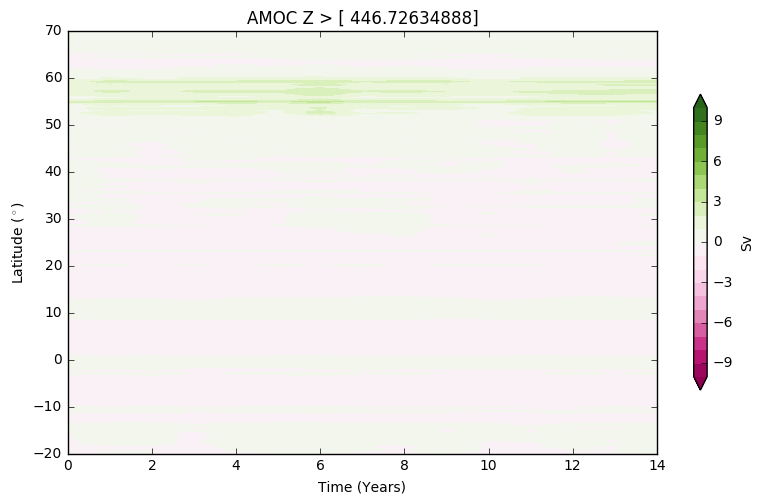

In [43]:
#AMOC Hovmoeller in Z space

t1=0
t2=15

time = np.arange(t1,t2,1)
print time.shape

st_min=np.argwhere(st_ocean<500)
st_min=st_min[-1]
print st_min

amoc_z_anom= pert_amoc_z[t1:t2,:,:] - cntrl_amoc_z[t1:t2,:,:]
print amoc_z_anom.shape

amoc_z_anom_max = np.max(amoc_z_anom[:,st_min:,:],1)
print amoc_z_anom_max.shape

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.linspace(-10,10,21)
#print clev

plt.subplot(211)
plt.contourf(time,yu_ocean,amoc_z_anom_max.T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_ylabel('Sv')
#plt.contour(yu_ocean,potrho,np.mean(cntrl_amoc_rho[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_amoc_rho[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((-75,-53))
#plt.ylim((1037.5,1035))
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Time (Years)')
plt.ylim([-20,70])
tit='AMOC Z > ' +str(st_ocean[st_min])
plt.title(tit)

In [25]:
#north atl mld
Ocean_File = os.path.join('/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp','output5*/ocean.nc')
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
cntrl_mld=ff.mld.load()
print cntrl_mld.shape


(51, 1080, 1440)


In [26]:

Ocean_File = os.path.join(PertDir,'output*/ocean.nc')
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
pert_mld=ff.mld.load()
print pert_mld.shape

(16, 1080, 1440)


In [52]:
ff=xr.open_mfdataset('/g/data1/v45/mtc599/mom5/jun16y/OUTPUT/ocean_surface_*.nc',engine='netcdf4',concat_dim='Time',decode_times=False)
print ff.mld_rho.shape
pert1_mld=ff.mld_rho[0:1825,:,:].mean('Time').load()
pert2_mld=ff.mld_rho[1825:3650,:,:].mean('Time').load()
pert3_mld=ff.mld_rho[3650:5475,:,:].mean('Time').load()
pert4_mld=ff.mld_rho[5475:7300,:,:].mean('Time').load()
print pert1_mld.shape


(7300, 1080, 1440)
(1080, 1440)


mld bounds lon1 lon2 lat1 lat2 [-99.875] [ 50.125] [ 30.13168517] 89.947282327


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


NameError: name 'pert1_mld' is not defined

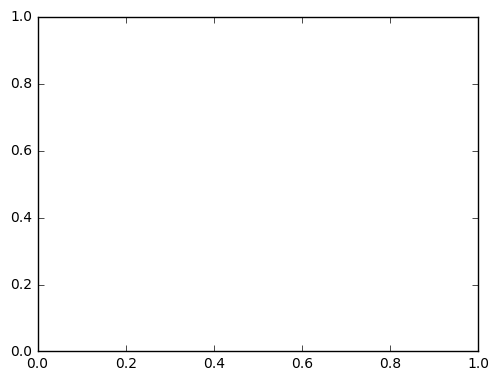

In [17]:
#plot mld
ii1=np.argwhere(xt_ocean>-100)# and lat<-45)
ii2=np.argwhere(xt_ocean>50)# and lat<-45)
jj1=np.argwhere(yt_ocean>30)# and lat<-45)
jj2=np.argwhere(yt_ocean>80)# and lat<-45)
ii1=ii1[0]
ii2=ii2[0]
jj1=jj1[0]
jj2=1079
#jj2=jj2[0]

print "mld bounds lon1 lon2 lat1 lat2", xt_ocean[ii1], xt_ocean[ii2], yt_ocean[jj1], yt_ocean[jj2]

plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

t1=0
t2=5
plt.subplot(221)#,axisbg='gray')
clev = np.arange(0,1200,100)
map = Basemap(llcrnrlon=-63,llcrnrlat=38,urcrnrlon=59,urcrnrlat=72,resolution='i',projection='cass',lon_0=-25,lat_0=66)
X, Y = map(geolon_t[jj1:jj2,ii1:ii2],geolat_t[jj1:jj2,ii1:ii2]) 
map.contourf(X,Y,pert1_mld[jj1:jj2,ii1:ii2], cmap=plt.cm.Purples, levels=clev, extend='max') #CMRmap_r, gist_stern_r
cb = plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('MLD\n (m)')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht[jj1:jj2,ii1:ii2],levels=clev3,colors='k',linewidths=0.25)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
#map.drawparallels(np.arange(-80.,81.,10.),labels=[True,False,False,True])
#map.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True])
plt.title('(a) Control')
#plt.show()

clev = np.arange(-200,210,10)
#clev2 = np.arange(-200,200,10)

t1=15
t2=20
plt.subplot(222)
map = Basemap(llcrnrlon=-63,llcrnrlat=38,urcrnrlon=59,urcrnrlat=72,resolution='i',projection='cass',lon_0=-25,lat_0=66)
X, Y = map(geolon_t[jj1:jj2,ii1:ii2],geolat_t[jj1:jj2,ii1:ii2]) 
map.contourf(X,Y,pert4_mld[jj1:jj2,ii1:ii2],cmap=plt.cm.PuOr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb = plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('MLD\n (m)')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht[jj1:jj2,ii1:ii2],levels=clev3,colors='k',linewidths=0.25)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,10.),labels=[True,False,False,True])
map.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True])
tit='(b) MLD Anom Years ' +str(t1+1) +'-' +str(t2)
plt.title(tit)
#plt.show()

t1=5
t2=10
plt.subplot(223)
map = Basemap(llcrnrlon=-63,llcrnrlat=38,urcrnrlon=59,urcrnrlat=72,resolution='i',projection='cass',lon_0=-25,lat_0=66)
X, Y = map(geolon_t[jj1:jj2,ii1:ii2],geolat_t[jj1:jj2,ii1:ii2]) 
map.contourf(X,Y,pert2_mld[jj1:jj2,ii1:ii2]-pert1_mld[jj1:jj2,ii1:ii2], cmap=plt.cm.PuOr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb = plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('MLD\n (m)')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht[jj1:jj2,ii1:ii2],levels=clev3,colors='k',linewidths=0.25)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,10.),labels=[True,False,False,True])
map.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True])
tit='(c) MLD Anom Years ' +str(t1+1) +'-' +str(t2)
plt.title(tit)

t1=10
t2=15
plt.subplot(224)
map = Basemap(llcrnrlon=-63,llcrnrlat=38,urcrnrlon=59,urcrnrlat=72,resolution='i',projection='cass',lon_0=-25,lat_0=66)
X, Y = map(geolon_t[jj1:jj2,ii1:ii2],geolat_t[jj1:jj2,ii1:ii2]) 
map.contourf(X,Y,pert3_mld[jj1:jj2,ii1:ii2]-pert1_mld[jj1:jj2,ii1:ii2], cmap=plt.cm.PuOr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb = plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('MLD\n (m)')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht[jj1:jj2,ii1:ii2],levels=clev3,colors='k',linewidths=0.25)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,10.),labels=[True,False,False,True])
map.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True])
tit='(d) MLD Anom Years ' +str(t1+1) +'-' +str(t2)
plt.title(tit)

plt.show()





In [24]:
print np.max(fh[540:1080,:])
print np.min(fh[540:1080,:])

3.59161e-06
4.91751e-09


In [32]:
#Hov of Sea Ice Conc. in Southern Ocean
print xt_ocean[1040]
print xt_ocean[878]

Ocean_File = os.path.join(CntrlDir,'output5*/ice_month.nc')
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.CN.shape
nyf_cn=ff.CN[:,:,:,878:1040].sum('ct').mean('xt').load()
print nyf_cn.shape

Ocean_File = os.path.join(PertDir,'output*/ice_month.nc')
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.CN.shape
pert_cn=ff.CN[:,:,:,878:1040].sum('ct').mean('xt').load()
print pert_cn.shape


-19.875
-60.375
(240, 5, 1080, 1440)
(240, 1080)
(192, 5, 1080, 1440)
(192, 1080)


(240, 1080)
(192, 1080)
(204, 1080)
(204,)
-19.875
-60.375
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


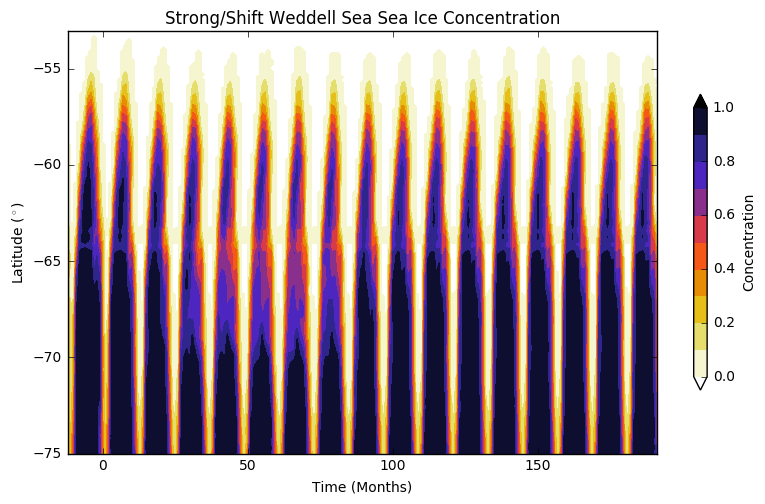

In [34]:
print nyf_cn.shape
print pert_cn.shape
cn = np.concatenate((nyf_cn[0:12,:],pert_cn),axis=0)
print cn.shape

time = np.arange(-12,192,1)
#print time
print time.shape

print xt_ocean[1040]
print xt_ocean[878]

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.linspace(0,1.0,11)
print clev

plt.subplot(211)
plt.contourf(time,yt_ocean,cn.T,cmap=plt.cm.CMRmap_r,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_ylabel('Concentration')
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((-75,-53))
#plt.ylim((1037.5,1035))
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Time (Months)')
#plt.xlim([-75,85])
plt.title('Strong/Shift Weddell Sea Sea Ice Concentration')